In [52]:
import numpy as np
import matplotlib.pyplot as plt

In [53]:
boardSize = (10,10)   # Legt die Größe des Feldes fest
timeSteps = 20 # Legt die Spieldauer fest (Anz. Iterationen)
safeDist = 10

In [54]:
# Classes

class player:
    def __init__(self,x,y):
        self.x = x
        self.y = y
    def move(self,dir):         # Wir können später gerne noch diagonale Bewegungen hinzufügen
        if dir == "up": self.y +=1
        if dir == "down": self.y -=1
        if dir == "right": self.x +=1
        if dir == "left": self.x -=1
            
            
class aim:
    def __init__(self,x,y):
        self.x = x
        self.y = y        
        
        
class obstacle:
    def __init__(self,x,y):
        self.x = x
        self.y = y 

In [55]:
def createMap(p,a,obstacles):
    m = np.ones(boardSize)
    m[p.x,p.y] = 0
    m[a.x,a.y] = 0.5
    for ob in obstacles:
        m[ob.x,ob.y] = 0.9
    return m


def createRewardMap(p,a,obstacles):
    m = np.ones(boardSize)
    m[p.x,p.y] = 0
    m[a.x,a.y] = 0.5
    for ob in obstacles:
        m[ob.x,ob.y] = 0.9
    return m

    
def showMap(m):
    plt.imshow(m, cmap='hot', interpolation='nearest')
    plt.show()
    
    
def showGameHist(hist,reward):
    for t in range(timeSteps):
        showMap(hist[t])
        print(reward[t])
        
        
def distance(a, b,special=False):
    #print(special)
    if(special):

        b.x
        return np.sqrt(np.square(a[0]-b.x)+np.square(a[1]-b.y))
    else:
        return np.sqrt(np.square(a.x-b.x)+np.square(a.y-b.y))

    
def checkBounds(p):
    if(p[0]<0):
        return -1000
    if(p[1]<0):
        return -1000
    if(p[0]>=boardSize[0]):
        return -1000
    if(p[1]>=boardSize[1]):
        return -1000
    return 0
    
    
def getRewardForAllFields(a,obstacles):  # Reward für alle Felder
    board = np.zeros((boardSize[0],boardSize[1]))
    for i in range(boardSize[0]):
        for j in range(boardSize[1]):
            board[i,j] = getRewardForField(i,j, a ,obstacles)
    return board


def getRewardForField(x,y, a ,obstacles):  # Reward für alle Felder
    pos = [x,y]
    reward = 100
    reward -= 10*1*distance(pos,a,special=True)
    reward += checkBounds(pos)
    for ob in obstacles:
        reward -= 30*np.exp(-(distance(pos,ob,special=True)*safeDist))
    if(x == a.x and y == a.y):
        reward =  2000
    return reward


def getRewardForMovements(p,a,obstacles):  # Reward für alle Felder
    actionReward = np.zeros(4)
    for i in range(4):
        p_pred = [p.x, p.y]
        if(i==0):
            p_pred[1] +=1
        if(i==1):
            p_pred[1] -=1
        if(i==2):
            p_pred[0] +=1
        if(i==3):
            p_pred[0] -=1
                   
        actionReward[i] = getRewardForField(p_pred[0],p_pred[1], a ,obstacles)
    return actionReward

########## Movements


actions = {
    0 : "up",
    1 : "down",
    2 : "right",
    3 : "left"
}   

In [56]:
getRewardForMovements(p,a,obstacles)

#Board
#player_pos
#Aim_pos


array([-953.85164807,   50.        , -941.23105626, -960.8276253 ])

In [61]:
# Init für Board und Reward
gameStates = np.zeros((timeSteps, boardSize[0],boardSize[1] ))  # Speichert Spielverlauf für jeden Timestep
reward = np.zeros(timeSteps)
num_Games = 100
X = np.zeros((num_Games*timeSteps,boardSize[0],boardSize[1]))
Y = np.zeros((num_Games*timeSteps,4))
# Initiale Start und End position
for j in range(num_Games):
    p = player(2,2)  # player is black
    p.x = np.random.randint(0,boardSize[0])
    p.y = np.random.randint(0,boardSize[1])
    a = aim(8,9)   # Aim is Orange
    
    obstacles = [
        obstacle(9,8),
        obstacle(5,5),
        obstacle(3,5),
        obstacle(7,4),
        obstacle(6,6),
        obstacle(6,5),
        obstacle(6,4)
    ]
    #gameStates[0] = createMap(p,a,obstacles) # Initiales Feld 
    #X[j*timeSteps]
    
    for i in range(0, timeSteps):   # Game Loop
        #showMap(createMap(p,a,obstacles))
        #p.move(actions[np.random.randint(4)]) # Bewegungen sind erstmal Random
        p.move(actions[np.argmax(getRewardForMovements(p,a,obstacles))])
        #print(str(p.x)+ " " + str(p.y))
        #print(actions[np.argmax(getRewardForMovements(p,a,obstacles))])
        #print(getRewardForMovements(p,a,obstacles))
        #reward[i] = getReward(p,a,obstacles)
        #print(p.y)
        gameStates[i] = createMap(p,a,obstacles)
        X[j*timeSteps+i] = createMap(p,a,obstacles)
        Y[j*timeSteps+i,np.argmax(getRewardForMovements(p,a,obstacles))] = 1
    #print("-----------------------------")
    
    
#showGameHist(gameStates, reward) # Zeigt spielverlauf und den aktuellen Reward an

In [62]:
np.round(getRewardForAllFields( a ,obstacles),2).astype(np.int)

array([[ -20,  -13,   -6,    0,    5,   10,   14,   17,   19,   20],
       [ -14,   -6,    1,    7,   13,   19,   23,   27,   29,   30],
       [  -8,    0,    7,   15,   21,   27,   32,   36,   39,   40],
       [  -2,    5,   13,   21,   29,    5,   41,   46,   49,   50],
       [   1,   10,   19,   27,   35,   43,   50,   55,   58,   60],
       [   5,   14,   23,   32,   41,   20,   57,   63,   68,   70],
       [   7,   17,   27,   36,   16,   25,   33,   71,   77,   80],
       [   9,   19,   29,   39,   19,   58,   68,   77,   85,   90],
       [  10,   20,   30,   40,   50,   60,   70,   80,   90, 2000],
       [   9,   19,   29,   39,   49,   58,   68,   77,   55,   90]])

In [63]:
X.shape

(20000, 10, 10)

In [64]:
Y.shape

(20000, 4)

Y[0]

In [65]:
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F
import torch

learning_rate = 0.01
momentum = 0.5

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(boardSize[0] *boardSize[1], 150)
        self.fc2 = nn.Linear(150, 200)
        #self.drop = nn.Dropout2d()
        self.fc3 = nn.Linear(200,400)
        self.s1 = nn.Linear(400,80)
        self.fc4 = nn.Linear(80,4)

    def forward(self, x):

        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        #x = F.dropout(x, training=self.training)
        x = F.sigmoid(self.fc3(x))
        x = F.sigmoid(self.s1(x))
        x = F.relu(self.fc4(x))
        return F.softmax(x)
network = Net()
optimizer = optim.SGD(network.parameters(), lr=learning_rate,
                      momentum=momentum)

In [66]:
Xt = torch.from_numpy(X.astype(np.float32))
Xt.requires_grad_()
Yt = torch.from_numpy(Y)
Yt.requires_grad_()

tensor([[0., 0., 1., 0.],
        [0., 0., 1., 0.],
        [0., 0., 1., 0.],
        ...,
        [0., 0., 1., 0.],
        [0., 0., 0., 1.],
        [0., 0., 1., 0.]], dtype=torch.float64, requires_grad=True)

In [72]:
epochs = 5000
batchSize = 1
err = np.zeros(epochs)
for i in range(epochs):
    if i%(epochs/10) == (epochs/10)-1:
        print(i+1)
    batchidx = np.random.randint(0,10,batchSize)
    network.train()
    optimizer.zero_grad()
    #print(Xt[batchidx].shape)
    yP = network.forward(Xt[batchidx].reshape(boardSize[0] *boardSize[1]))
    #print(yP)
    loss = (yP - Yt[batchidx]).pow(2).sum()
    #print(loss)
    err[i] = loss
    loss.backward()
    optimizer.step()

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/torch/nn/functional.py:1569: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
<ipython-input-65-20a076d3b2f3>:27: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.softmax(x)


5000
10000
15000
20000
25000
30000
35000
40000
45000
50000


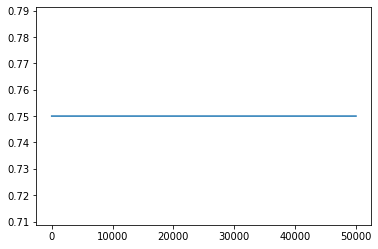

In [73]:
plt.plot(err)

In [74]:
np.argmax(network.forward(Xt[10].reshape(boardSize[0] *boardSize[1])).detach().numpy())

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/torch/nn/functional.py:1569: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
<ipython-input-65-20a076d3b2f3>:27: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.softmax(x)


0

up
0
up
1
up
2
up
3
up
4
up
5
up
6
up
7


<ipython-input-65-20a076d3b2f3>:27: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.softmax(x)


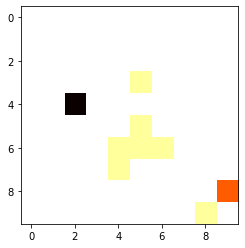

0.0


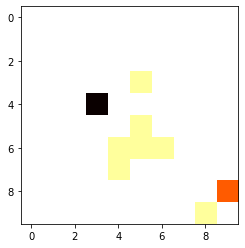

0.0


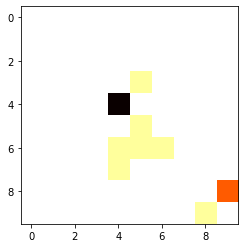

0.0


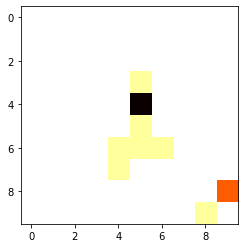

0.0


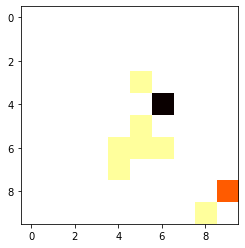

0.0


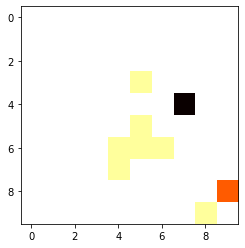

0.0


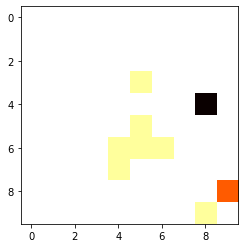

0.0


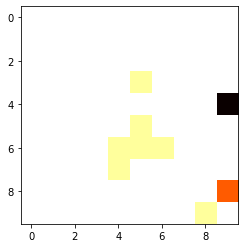

0.0


In [76]:
# Init für Board und Reward
gameStates = np.zeros((timeSteps, boardSize[0],boardSize[1] ))  # Speichert Spielverlauf für jeden Timestep
reward = np.zeros(timeSteps)
num_Games = 1
timeSteps = 8
X = np.zeros((num_Games*timeSteps,boardSize[0],boardSize[1]))
Y = np.zeros((num_Games*timeSteps,4))
# Initiale Start und End position
for j in range(num_Games):
    p = player(2,2)  # player is black
    p.x = np.random.randint(0,boardSize[0])
    p.y = np.random.randint(0,boardSize[1])
    a = aim(8,9)   # Aim is Orange
    
    obstacles = [
        obstacle(9,8),
        obstacle(5,5),
        obstacle(3,5),
        obstacle(7,4),
        obstacle(6,6),
        obstacle(6,5),
        obstacle(6,4)
    ]
    #gameStates[0] = createMap(p,a,obstacles) # Initiales Feld 
    #X[j*timeSteps]
    
    for i in range(0, timeSteps):   # Game Loop
        #showMap(createMap(p,a,obstacles))
        #p.move(actions[np.random.randint(4)]) # Bewegungen sind erstmal Random
        act = torch.from_numpy(createMap(p,a,obstacles).astype(np.float32))
        print(actions[np.argmax(network.forward(act.reshape(boardSize[0] *boardSize[1])).detach().numpy())])
        p.move(actions[np.argmax(network.forward(act.reshape(boardSize[0] *boardSize[1])).detach().numpy())])
        
        #p.move(actions[np.argmax(getRewardForMovements(p,a,obstacles))])
        #print(str(p.x)+ " " + str(p.y))
        #print(actions[np.argmax(getRewardForMovements(p,a,obstacles))])
        #print(getRewardForMovements(p,a,obstacles))
        #reward[i] = getReward(p,a,obstacles)
        #print(p.y)
        print(i)
        gameStates[i] = createMap(p,a,obstacles)
        X[j*timeSteps+i] = createMap(p,a,obstacles)
        Y[j*timeSteps+i,np.argmax(getRewardForMovements(p,a,obstacles))] = 1
    #print("-----------------------------")
    
    
showGameHist(gameStates, reward) # Zeigt spielverlauf und den aktuellen Reward an